In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"

In [66]:
df = pd.read_excel(f"{data_dir}/ny_fed/sce-labor-microdata-public.xlsx", sheet_name="Data", skiprows = [0])
df1 = pd.read_excel(f"{data_dir}/ny_fed/frbny-sce-public-microdata-latest.xlsx", sheet_name="Data", skiprows = [0])
df2 = pd.read_excel(f"{data_dir}/ny_fed/FRBNY-SCE-Public-Microdata-Complete-17-19.xlsx", sheet_name = "Data", skiprows= [0])

In [69]:
df3 = pd.concat([df1, df2], ignore_index=True)

In [70]:
df3

,date,userid,tenure,weight,Q1,Q1a,Q1apart2,Q2,Q3,Q4new,...,QRA1,QRA2,survey_date,date_dt,_AGE_CAT,_NUM_CAT,_REGION_CAT,_COMMUTING_ZONE,_EDU_CAT,_HH_INC_CAT
0,202001,70103231,12,0.818250,4.0,NaN,NaN,3.0,20.0,62.0,...,NaN,NaN,2020-01-23,2020-01-01,40 to 60,High,West,218.0,College,Over 100k
1,202001,70103252,11,2.879998,3.0,NaN,NaN,2.0,1.0,30.0,...,NaN,NaN,2020-01-02,2020-01-01,40 to 60,Low,Northeast,203.0,High School,Under 50k
2,202001,70103258,12,0.549674,4.0,NaN,NaN,4.0,0.0,3.0,...,NaN,NaN,2020-01-07,2020-01-01,Over 60,High,South,102.0,College,50k to 100k
3,202001,70103285,12,0.481746,4.0,NaN,NaN,4.0,10.0,10.0,...,NaN,NaN,2020-01-27,2020-01-01,Under 40,High,Midwest,100.0,College,50k to 100k
4,202001,70103342,11,0.481746,3.0,NaN,NaN,3.0,65.0,50.0,...,NaN,NaN,2020-01-21,2020-01-01,Under 40,High,Midwest,58.0,College,50k to 100k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106630,201912,70112518,1,0.959639,3.0,NaN,NaN,4.0,50.0,50.0,...,3.0,5.0,2019-12-11,NaT,Under 40,Low,South,560.0,Some College,50k to 100k
106631,201912,70112528,1,0.826928,1.0,NaN,NaN,1.0,70.0,65.0,...,3.0,4.0,2019-12-03,NaT,Under 40,High,West,612.0,Some College,Under 50k
106632,201912,70112531,1,0.592573,1.0,NaN,NaN,5.0,69.0,53.0,...,5.0,3.0,2019-12-09,NaT,40 to 60,Low,Northeast,215.0,Some College,50k to 100k
106633,201912,70112533,1,2.373776,4.0,NaN,NaN,3.0,0.0,45.0,...,4.0,3.0,2019-12-03,NaT,Over 60,High,Midwest,148.0,High School,Under 50k


In [71]:
# make variable for merge 
df['date'] = pd.to_datetime(df['date'], format='%Y%m')
df3['date'] = pd.to_datetime(df3['date'], format='%Y%m')
final = pd.merge(df, df3, on = ['date', 'userid'])

In [73]:
select = ['userid', 'date', 'Q10_1', 'Q10_2', 'Q10_3', 'js5', 'js6', 'js7', 'js9', 'nl1']


data = final[select]

In [74]:
data['emp_stat'] = np.where((data['Q10_1'] == 1) | (data['Q10_2'] == 1), 1,
                np.where(data['Q10_3'] == 1, 0, np.nan))

data = data.dropna(subset=['emp_stat'])
data = data.drop(columns = ['Q10_1', 'Q10_2', 'Q10_3'])

C:\Users\singhy\AppData\Local\Temp\ipykernel_3896\2488295817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['emp_stat'] = np.where((data['Q10_1'] == 1) | (data['Q10_2'] == 1), 1,


In [75]:
data.rename(columns={
    'userid': 'user_id',
    'date': 'survey_date',
    'js5' : 'unemp_search', 
    'js6': 'emp_search',
    'js7': 'search_length',
    'js9': 'hours_search',
    'nl1': 'job_offers_rec'
}, inplace=True)

In [76]:
keep = ['user_id', 'survey_date', 'unemp_search',
       'emp_search', 'search_length', 'hours_search', 'job_offers_rec',
       'emp_stat']
data = data[keep]
data = data[data['survey_date'] > '2015-11-01']

In [77]:
data['emp_search'] = np.where(data['emp_search'].isin([1, 2]), 1, 0)
data['unemp_search'] = np.where(data['unemp_search'].isin([1]), 1, 0)

data['search_status'] = np.where((data['emp_search'] == 1) | (data['unemp_search'] == 1), 1, 0)


In [78]:
data = data.reset_index(drop=True)

In [79]:
# Count the number of employed (emp_stat == 1) per year
data['E'] = data.groupby('survey_date')['emp_stat'].transform(lambda x: (x == 1).sum())

# Count the number of unemployed (emp_stat == 0) per year
data['U'] = data.groupby('survey_date')['emp_stat'].transform(lambda x: (x == 0).sum())

# Labor Force 
data['L'] = data['E'] + data['U']

# Employment Share 
data['emp_share'] = data['E'] / data['L']
data['unemp_share'] = data['U'] / data['L']

In [80]:
######################################################
# Extensive Margin Search 
######################################################

# Employed Workers searching for a job 
data['tot_emp_search'] = data.groupby('survey_date')['emp_search'].transform(lambda x: (x == 1).sum())

# Unemployed workers search for a job 

data['tot_unemp_search'] = data.groupby('survey_date')['unemp_search'].transform(lambda x: (x == 1).sum())

data['emp_search_share'] = data['tot_emp_search'] / (data['E'] + data['U'])

data['unemp_search_share'] = data['tot_unemp_search'] / (data['E'] + data['U'])

data['tot_search_share'] = data['emp_search_share'] + data['unemp_search_share']

data['share_unemp_search'] = data['tot_unemp_search'] / data['U']
data['share_emp_search'] = data['tot_emp_search'] / data['E']

In [81]:
data = data[((data['hours_search'] <= 168) | (data['hours_search'].isna()))] 
data = data[(data['search_length'] < 200) | (data['hours_search'].isna())]

In [82]:
data = data.reset_index(drop=True)

In [83]:
################################################################
# Intensive Margin Search 
################################################################

# Search Hours supplied by employed workers 
data['emp_search_hours'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 1) & (data['emp_search'] == 1)].dropna().sum()
)

# Search Hours supplied by unemployed workers 
data['unemp_search_hours'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 0) & (data['unemp_search'] == 1)].dropna().sum()
)

# Total hours of search 
data['tot_search_hours'] = data['emp_search_hours'] + data['unemp_search_hours']

# Share of hours supplied by employed workers 
data['emp_share_search_hours'] = data['emp_search_hours']  / data['tot_search_hours']

# Share of hours supplied by unemployed workers 
data['unemp_share_search_hours'] = data['unemp_search_hours'] / data['tot_search_hours']

# Median and standard deviation hours of search conditional on employed and searching 

data['median_search_hours_emp'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 1) & (data['emp_search'] == 1)].dropna().median()
)

data['std_search_hours_emp'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 1) & (data['emp_search'] == 1)].dropna().std()
)

# Median and standard deviation hours of search conditional on unemployed and searching 
data['median_search_hours_unemp'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 0) & (data['unemp_search'] == 1)].dropna().median()
)

data['std_search_hours_unemp'] = data.groupby('survey_date')['hours_search'].transform(
    lambda x: x[(data['emp_stat'] == 0) & (data['unemp_search'] == 1)].dropna().std()
)


In [84]:
select = ['survey_date', 'E', 'U', 'L', 'emp_share', 'unemp_share', 
          'tot_emp_search', 'tot_unemp_search', 'tot_search_share', 
          'emp_search_share', 'unemp_search_share', 
          'share_unemp_search', 'share_emp_search', 
          'tot_search_hours', 'emp_share_search_hours', 'unemp_share_search_hours', 
          'median_search_hours_emp', 'std_search_hours_emp', 
          'median_search_hours_unemp', 'std_search_hours_unemp']

agg_data = data[select]

In [85]:
agg_data = agg_data.drop_duplicates().reset_index(drop=True)

In [86]:
agg_data

,survey_date,E,U,L,emp_share,unemp_share,tot_emp_search,tot_unemp_search,tot_search_share,emp_search_share,unemp_search_share,share_unemp_search,share_emp_search,tot_search_hours,emp_share_search_hours,unemp_share_search_hours,median_search_hours_emp,std_search_hours_emp,median_search_hours_unemp,std_search_hours_unemp
0,2017-03-01,801,41,842,0.951306,0.048694,136,23,0.188836,0.161520,0.027316,0.560976,0.169788,953.0,0.691501,0.308499,2.0,11.559742,7.0,15.504838
1,2017-07-01,796,36,832,0.956731,0.043269,161,24,0.222356,0.193510,0.028846,0.666667,0.202261,842.0,0.736342,0.263658,2.0,5.620191,8.0,9.721619
2,2017-11-01,790,38,828,0.954106,0.045894,151,30,0.218599,0.182367,0.036232,0.789474,0.191139,841.0,0.554102,0.445898,2.0,4.343053,5.0,19.343982
3,2018-03-01,758,30,788,0.961929,0.038071,139,22,0.204315,0.176396,0.027919,0.733333,0.183377,855.0,0.533333,0.466667,2.0,4.970771,17.0,17.479236
4,2018-07-01,765,45,810,0.944444,0.055556,159,31,0.234568,0.196296,0.038272,0.688889,0.207843,961.0,0.527575,0.472425,2.0,5.786180,14.0,9.097796
5,2018-11-01,777,30,807,0.962825,0.037175,143,22,0.204461,0.177200,0.027261,0.733333,0.184041,806.0,0.611663,0.388337,2.0,5.359679,10.0,16.628003
6,2019-03-01,799,38,837,0.954600,0.045400,165,25,0.227001,0.197133,0.029869,0.657895,0.206508,927.0,0.728155,0.271845,2.0,7.839674,7.0,9.500572
7,2019-07-01,777,27,804,0.966418,0.033582,164,15,0.222637,0.203980,0.018657,0.555556,0.211068,735.0,0.776871,0.223129,2.0,7.241236,6.5,11.776303
8,2019-11-01,736,32,768,0.958333,0.041667,123,17,0.182292,0.160156,0.022135,0.531250,0.167120,606.0,0.752475,0.247525,2.0,5.672579,7.0,8.278249
9,2020-03-01,707,26,733,0.964529,0.035471,153,14,0.227831,0.208731,0.019100,0.538462,0.216407,709.0,0.723554,0.276446,2.0,6.267279,14.0,9.511127


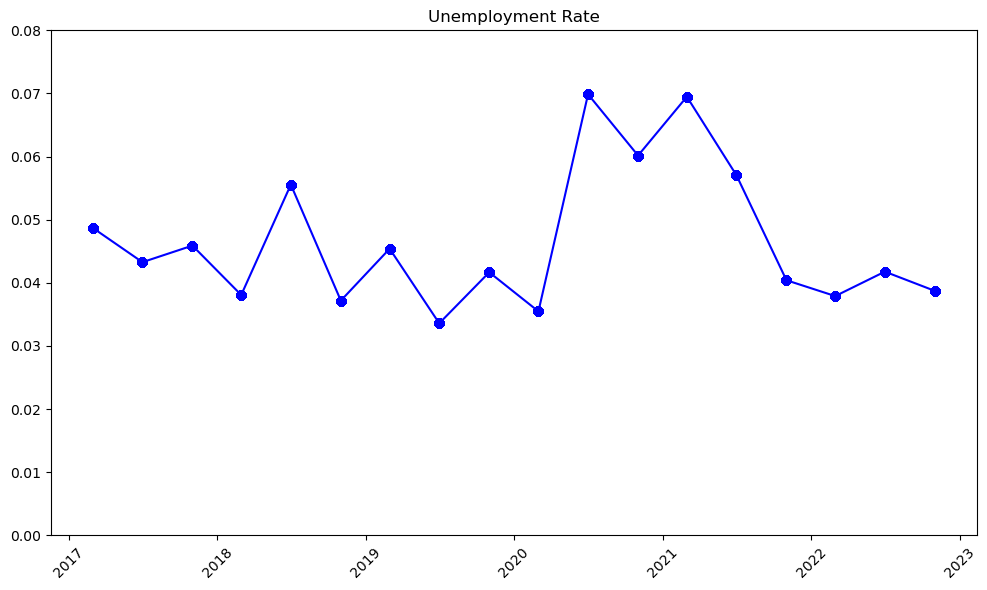

In [90]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['survey_date'], data['unemp_share'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.title('Unemployment Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.ylim(0,.08)
# Show plot
plt.tight_layout()
plt.show()

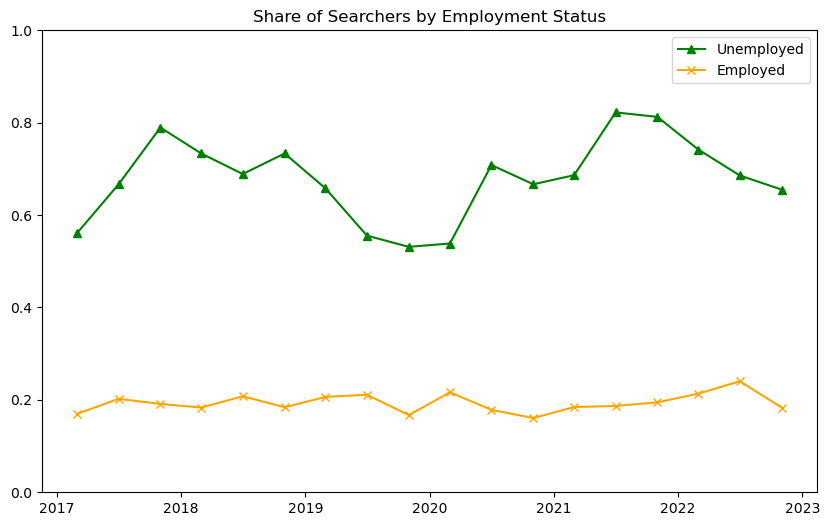

In [101]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot unemployed search share (added marker for clarity)
plt.plot(agg_data['survey_date'], agg_data['share_unemp_search'], marker='^', label='Unemployed', color = 'green')

# Plot employed search share
plt.plot(agg_data['survey_date'], agg_data['share_emp_search'], marker='x', label='Employed', color = 'orange')

# Add titles and labels
plt.title('Share of Searchers by Employment Status')
plt.legend()
plt.ylim(0,1)

# Show the plot
plt.show()

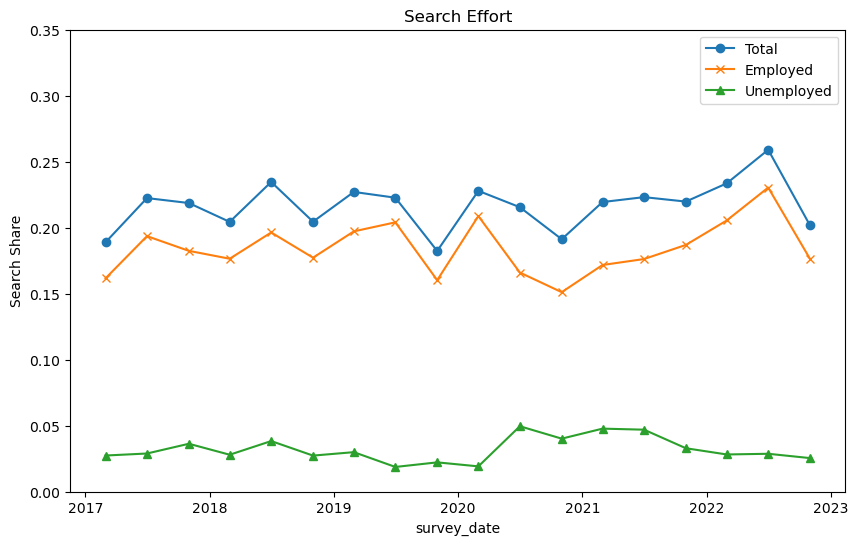

In [105]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot total search share
plt.plot(agg_data['survey_date'], agg_data['tot_search_share'], marker='o', label='Total')

# Plot employed search share
plt.plot(agg_data['survey_date'], agg_data['emp_search_share'], marker='x', label='Employed')

# Plot unemployed search share (added marker for clarity)
plt.plot(agg_data['survey_date'], agg_data['unemp_search_share'], marker='^', label='Unemployed')

# Add titles and labels
plt.title('Search Effort')
plt.xlabel('survey_date')
plt.ylabel('Search Share')
plt.ylim(0,.35)
plt.legend()

# Show the plot
plt.show()

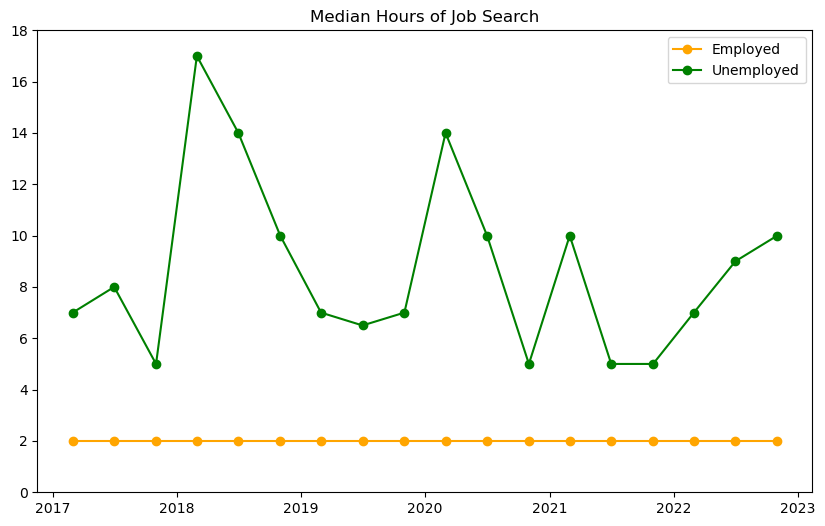

In [107]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot avg_search_hours_emp
plt.plot(agg_data['survey_date'], agg_data['median_search_hours_emp'], label='Employed', marker='o', color = 'orange')

# Plot avg_search_hours_unemp
plt.plot(agg_data['survey_date'], agg_data['median_search_hours_unemp'], label='Unemployed', marker='o', color = 'green')

# Add titles and labels
plt.title('Median Hours of Job Search')
plt.ylim(0,18)
plt.legend()


# Show the plot
plt.show()

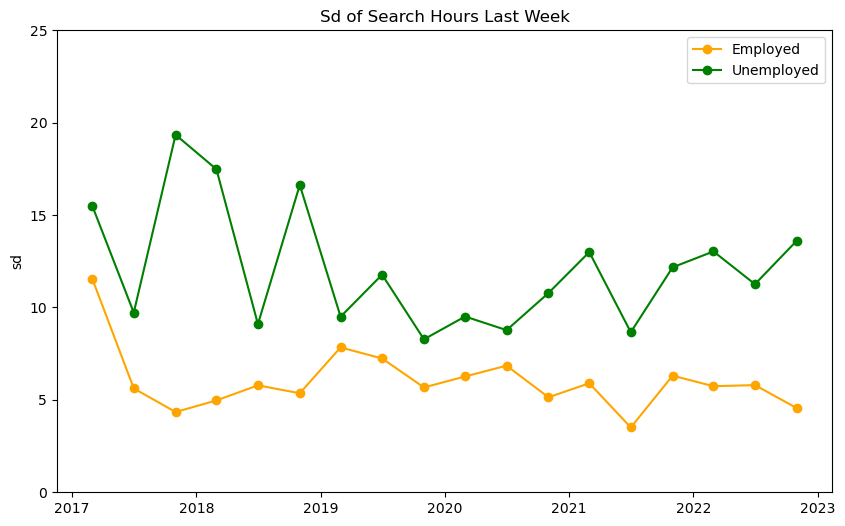

In [112]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot avg_search_hours_emp
plt.plot(agg_data['survey_date'], agg_data['std_search_hours_emp'], label='Employed', marker='o', color = 'orange')

# Plot avg_search_hours_unemp
plt.plot(agg_data['survey_date'], agg_data['std_search_hours_unemp'], label='Unemployed', marker='o', color = 'green')

# Add titles and labels
plt.title('Sd of Search Hours Last Week')
plt.ylabel('sd')
plt.legend()
plt.ylim(0,25)

# Show the plot
plt.show()

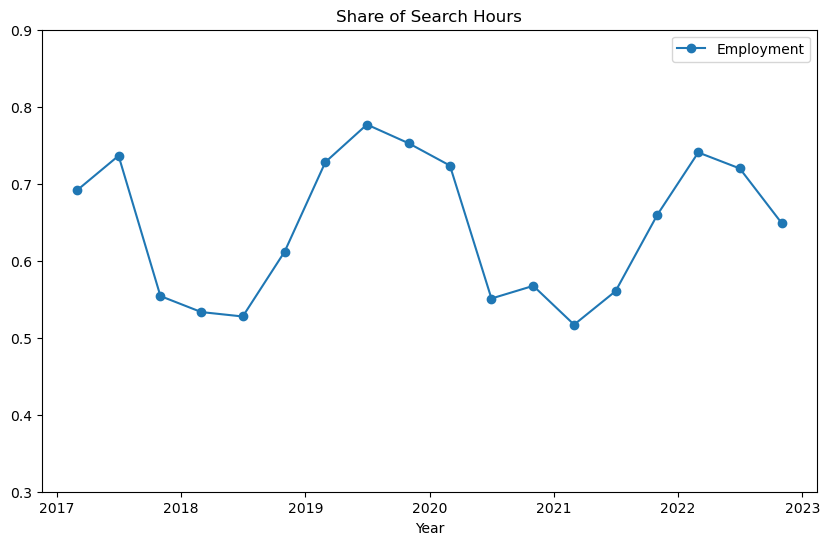

In [114]:
# Plotting average search hours for employed and unemployed workers
plt.figure(figsize=(10, 6))

# Plot total search share
plt.plot(agg_data['survey_date'], agg_data['emp_share_search_hours'], marker='o', label='Employment')

# Add titles and labels
plt.title('Share of Search Hours')
plt.xlabel('Year')
plt.legend()
plt.ylim(.3,.9)

# Show the plot
plt.show()

In [116]:
emp_workers = data[data['emp_search'] == 1]
unemp_workers = data[data['unemp_search'] == 1]

In [131]:
emp_workers

,user_id,survey_date,unemp_search,emp_search,search_length,hours_search,job_offers_rec,emp_stat,search_status,E,...,share_emp_search,emp_search_hours,unemp_search_hours,tot_search_hours,emp_share_search_hours,unemp_share_search_hours,median_search_hours_emp,std_search_hours_emp,median_search_hours_unemp,std_search_hours_unemp
0,70069431,2017-03-01,0,1,3.0,2.0,0.0,1.0,1,801,...,0.169788,659.0,294.0,953.0,0.691501,0.308499,2.0,11.559742,7.0,15.504838
3,70069463,2017-03-01,0,1,1.0,1.0,0.0,1.0,1,801,...,0.169788,659.0,294.0,953.0,0.691501,0.308499,2.0,11.559742,7.0,15.504838
6,70069619,2017-03-01,0,1,1.0,2.0,0.0,1.0,1,801,...,0.169788,659.0,294.0,953.0,0.691501,0.308499,2.0,11.559742,7.0,15.504838
9,70069670,2017-03-01,0,1,2.0,3.0,1.0,1.0,1,801,...,0.169788,659.0,294.0,953.0,0.691501,0.308499,2.0,11.559742,7.0,15.504838
33,70070842,2017-03-01,0,1,2.0,5.0,1.0,1.0,1,801,...,0.169788,659.0,294.0,953.0,0.691501,0.308499,2.0,11.559742,7.0,15.504838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14123,75009227,2022-11-01,0,1,4.0,0.0,0.0,1.0,1,720,...,0.183333,427.0,231.0,658.0,0.648936,0.351064,2.0,4.553096,10.0,13.614792
14128,75009273,2022-11-01,0,1,4.0,2.0,0.0,1.0,1,720,...,0.183333,427.0,231.0,658.0,0.648936,0.351064,2.0,4.553096,10.0,13.614792
14132,75009292,2022-11-01,0,1,12.0,2.0,1.0,1.0,1,720,...,0.183333,427.0,231.0,658.0,0.648936,0.351064,2.0,4.553096,10.0,13.614792
14133,75009299,2022-11-01,0,1,5.0,4.0,0.0,1.0,1,720,...,0.183333,427.0,231.0,658.0,0.648936,0.351064,2.0,4.553096,10.0,13.614792


In [117]:
emp_workers = emp_workers[(emp_workers['hours_search'].isna()) | (emp_workers['hours_search'] <= 168)]
unemp_workers = unemp_workers[(unemp_workers['hours_search'].isna()) | (unemp_workers['hours_search'] <= 168)]

In [132]:
avg_job_offers_emp = emp_workers.groupby('survey_date')['job_offers_rec'].mean()
avg_job_offers_unemp = unemp_workers.groupby('survey_date')['job_offers_rec'].mean()


avg_search_length_emp = emp_workers.groupby('survey_date')['search_length'].mean()
avg_search_length_unemp = unemp_workers.groupby('survey_date')['search_length'].mean()

In [137]:
med_job_offers_emp = emp_workers.groupby('survey_date')['job_offers_rec'].median()
med_job_offers_unemp = unemp_workers.groupby('survey_date')['job_offers_rec'].median()


med_search_length_emp = emp_workers.groupby('survey_date')['search_length'].median()
med_search_length_unemp = unemp_workers.groupby('survey_date')['search_length'].median()

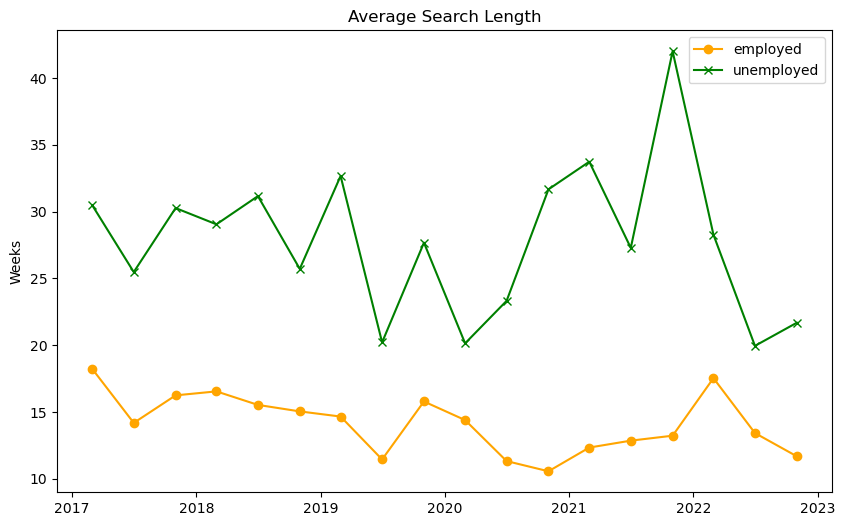

In [138]:
plt.figure(figsize=(10, 6))

# Plot average job offers for employed workers
plt.plot(avg_search_length_emp.index, avg_search_length_emp.values, marker='o', linestyle='-', color='orange', label='employed')

# Plot average job offers for unemployed workers
plt.plot(avg_search_length_unemp.index, avg_search_length_unemp.values, marker='x', linestyle='-', color='green', label='unemployed')

# Add titles and labels
plt.title('Average Search Length')
plt.ylabel('Weeks')
plt.legend()
# Show the plot
plt.show()


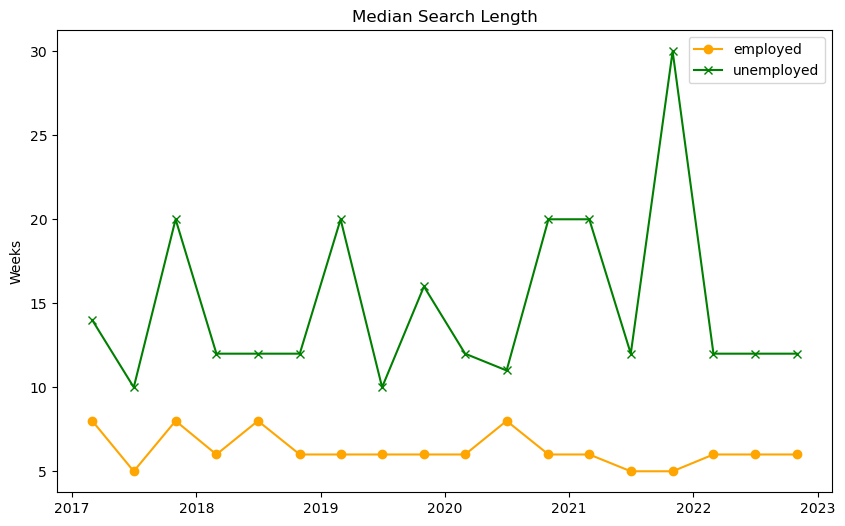

In [143]:
plt.figure(figsize=(10, 6))

# Plot average job offers for employed workers
plt.plot(med_search_length_emp.index, med_search_length_emp.values, marker='o', linestyle='-', color='orange', label='employed')

# Plot average job offers for unemployed workers
plt.plot(med_search_length_unemp.index, med_search_length_unemp.values, marker='x', linestyle='-', color='green', label='unemployed')

# Add titles and labels
plt.title('Median Search Length')
plt.ylabel('Weeks')
plt.legend()
# Show the plot
plt.show()

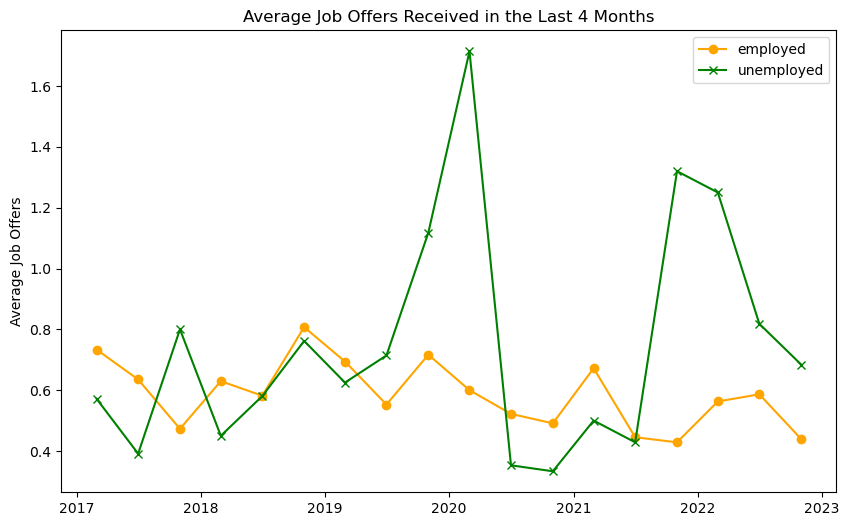

In [144]:
plt.figure(figsize=(10, 6))

# Plot average job offers for employed workers
plt.plot(avg_job_offers_emp.index, avg_job_offers_emp.values, marker='o', linestyle='-', color='orange', label='employed')

# Plot average job offers for unemployed workers
plt.plot(avg_job_offers_unemp.index, avg_job_offers_unemp.values, marker='x', linestyle='-', color='green', label='unemployed')

# Add titles and labels
plt.title('Average Job Offers Received in the Last 4 Months')
plt.ylabel('Average Job Offers')
plt.legend()
# Show the plot
plt.show()


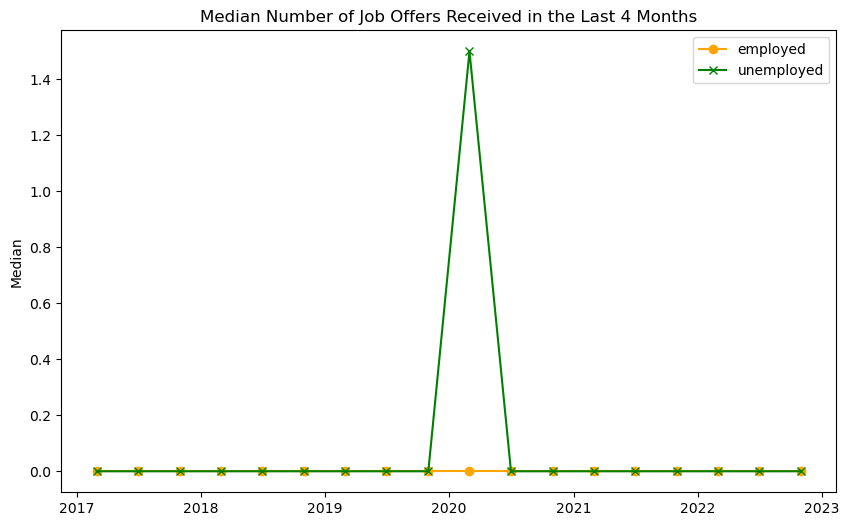

In [145]:
plt.figure(figsize=(10, 6))

# Plot average job offers for employed workers
plt.plot(med_job_offers_emp.index, med_job_offers_emp.values, marker='o', linestyle='-', color='orange', label='employed')

# Plot average job offers for unemployed workers
plt.plot(med_job_offers_unemp.index, med_job_offers_unemp.values, marker='x', linestyle='-', color='green', label='unemployed')

# Add titles and labels
plt.title('Median Number of Job Offers Received in the Last 4 Months')
plt.ylabel('Median')
plt.legend()
# Show the plot
plt.show()


In [146]:
agg_data

,survey_date,E,U,L,emp_share,unemp_share,tot_emp_search,tot_unemp_search,tot_search_share,emp_search_share,unemp_search_share,share_unemp_search,share_emp_search,tot_search_hours,emp_share_search_hours,unemp_share_search_hours,median_search_hours_emp,std_search_hours_emp,median_search_hours_unemp,std_search_hours_unemp
0,2017-03-01,801,41,842,0.951306,0.048694,136,23,0.188836,0.161520,0.027316,0.560976,0.169788,953.0,0.691501,0.308499,2.0,11.559742,7.0,15.504838
1,2017-07-01,796,36,832,0.956731,0.043269,161,24,0.222356,0.193510,0.028846,0.666667,0.202261,842.0,0.736342,0.263658,2.0,5.620191,8.0,9.721619
2,2017-11-01,790,38,828,0.954106,0.045894,151,30,0.218599,0.182367,0.036232,0.789474,0.191139,841.0,0.554102,0.445898,2.0,4.343053,5.0,19.343982
3,2018-03-01,758,30,788,0.961929,0.038071,139,22,0.204315,0.176396,0.027919,0.733333,0.183377,855.0,0.533333,0.466667,2.0,4.970771,17.0,17.479236
4,2018-07-01,765,45,810,0.944444,0.055556,159,31,0.234568,0.196296,0.038272,0.688889,0.207843,961.0,0.527575,0.472425,2.0,5.786180,14.0,9.097796
5,2018-11-01,777,30,807,0.962825,0.037175,143,22,0.204461,0.177200,0.027261,0.733333,0.184041,806.0,0.611663,0.388337,2.0,5.359679,10.0,16.628003
6,2019-03-01,799,38,837,0.954600,0.045400,165,25,0.227001,0.197133,0.029869,0.657895,0.206508,927.0,0.728155,0.271845,2.0,7.839674,7.0,9.500572
7,2019-07-01,777,27,804,0.966418,0.033582,164,15,0.222637,0.203980,0.018657,0.555556,0.211068,735.0,0.776871,0.223129,2.0,7.241236,6.5,11.776303
8,2019-11-01,736,32,768,0.958333,0.041667,123,17,0.182292,0.160156,0.022135,0.531250,0.167120,606.0,0.752475,0.247525,2.0,5.672579,7.0,8.278249
9,2020-03-01,707,26,733,0.964529,0.035471,153,14,0.227831,0.208731,0.019100,0.538462,0.216407,709.0,0.723554,0.276446,2.0,6.267279,14.0,9.511127
